<a href="https://colab.research.google.com/github/ayush24578/Concepts-and-Technologies-of-AI/blob/main/Ayush_Dhungana_Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
file_path = '/content/drive/MyDrive/AI/diabetes_.csv'
df = pd.read_csv(file_path)

In [4]:
(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
(df.isnull().sum())

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    df[col] = df[col].replace(0, df[col].median())
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

np.random.seed(42)
indices = np.random.permutation(len(X))
train_size = int(0.7 * len(X))

train = indices[:train_size]
test = indices[train_size:]

X_train, X_test = X[train], X[test]
y_train, y_test = y[train], y[test]
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (537, 8)
X_test shape: (231, 8)
y_train shape: (537,)
y_test shape: (231,)


In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [14]:
def knn_predict_single(X_train, y_train, query, k):
    distances = []

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], query)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])

    k_nearest = distances[:k]
    labels = [label for _, label in k_nearest]

    return max(set(labels), key=labels.count)

In [15]:
def knn_predict(X_train, y_train, X_test, k):
    predictions = []

    for x in X_test:
        predictions.append(knn_predict_single(X_train, y_train, x, k))

    return np.array(predictions)

In [16]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [17]:
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)
acc_original = accuracy(y_test, y_pred)

print("Accuracy:", acc_original)

Accuracy: 0.7359307359307359


In [18]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = min_max_scale(X)
X_train_scaled = X_scaled[train]
X_test_scaled = X_scaled[test]
y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print("Accuracy with scaled data:", acc_scaled)
# 2
print("Accuracy on original data:", acc_original)
print("Accuracy on scaled data:  ", acc_scaled)

if acc_scaled > acc_original:
    print("\nScaling improved KNN performance.")
elif acc_scaled < acc_original:
    print("\nScaling decreased KNN performance.")
else:
    print("\nScaling did not change KNN performance.")

Accuracy with scaled data: 0.7575757575757576
Accuracy on original data: 0.7359307359307359
Accuracy on scaled data:   0.7575757575757576

Scaling improved KNN performance.


In [22]:
import time
k_values = range(1, 16)

# Lists to store results
acc_original_list = []
acc_scaled_list = []
time_original_list = []
time_scaled_list = []

for k in k_values:
    # Original data
    start = time.time()
    y_pred_orig = knn_predict(X_train, y_train, X_test, k)
    end = time.time()
    acc_original_list.append(accuracy(y_test, y_pred_orig))
    time_original_list.append(end - start)
    # Scaled data
    start = time.time()
    y_pred_scaled = knn_predict(X_train_scaled, y_train, X_test_scaled, k)
    end = time.time()
    acc_scaled_list.append(accuracy(y_test, y_pred_scaled))
    time_scaled_list.append(end - start)

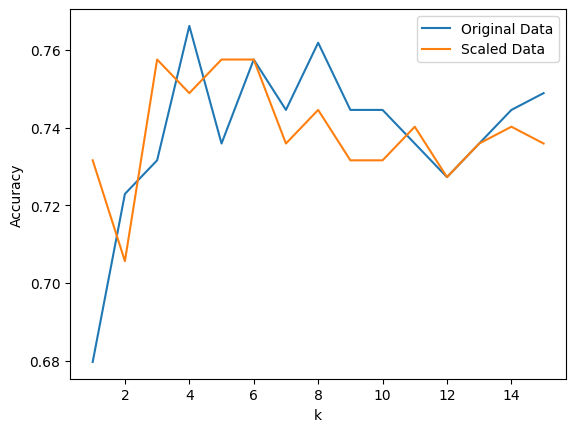

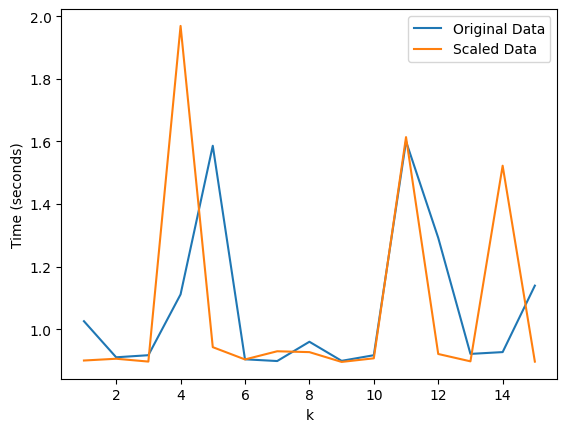

In [23]:
plt.figure()
plt.plot(k_values, acc_original_list, label='Original Data')
plt.plot(k_values, acc_scaled_list, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# – k vs. Time Taken for original and scaled datasets.
plt.figure()
plt.plot(k_values, time_original_list, label='Original Data')
plt.plot(k_values, time_scaled_list, label='Scaled Data')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()